### RESAMPLING TECHNIQUES 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
pd.set_option("display.max_columns" , 50)

In [2]:
df = pd.read_csv("D:\Capstone Project\Training_Dataset_v2.csv")
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [3]:
#making it Nan first and then replacing to avoid misinterpretation

df['perf_6_month_avg'].replace(-99,np.NaN, inplace=True)
df['perf_12_month_avg'].replace(-99,np.NaN,inplace=True)

In [4]:
df["lead_time"] = df["lead_time"].fillna(df["lead_time"].median())
df["perf_6_month_avg"] = df["perf_6_month_avg"].fillna(df["perf_6_month_avg"].median())
df["perf_12_month_avg"] = df["perf_12_month_avg"].fillna(df["perf_12_month_avg"].median())

In [5]:
## This last row considered to be invalid and can be removed 

df = df.dropna()

In [6]:
df["potential_issue"] = df["potential_issue"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["deck_risk"] = df["deck_risk"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["oe_constraint"] = df["oe_constraint"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["ppap_risk"] = df["ppap_risk"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["stop_auto_buy"] = df["stop_auto_buy"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["rev_stop"] = df["rev_stop"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["went_on_backorder"] = df["went_on_backorder"].replace({"Yes" : 1 , "No" : 0}).astype(int)

In [7]:
df['went_on_backorder'].value_counts()

0    1676567
1      11293
Name: went_on_backorder, dtype: int64

Text(0, 0.5, 'Frequency')

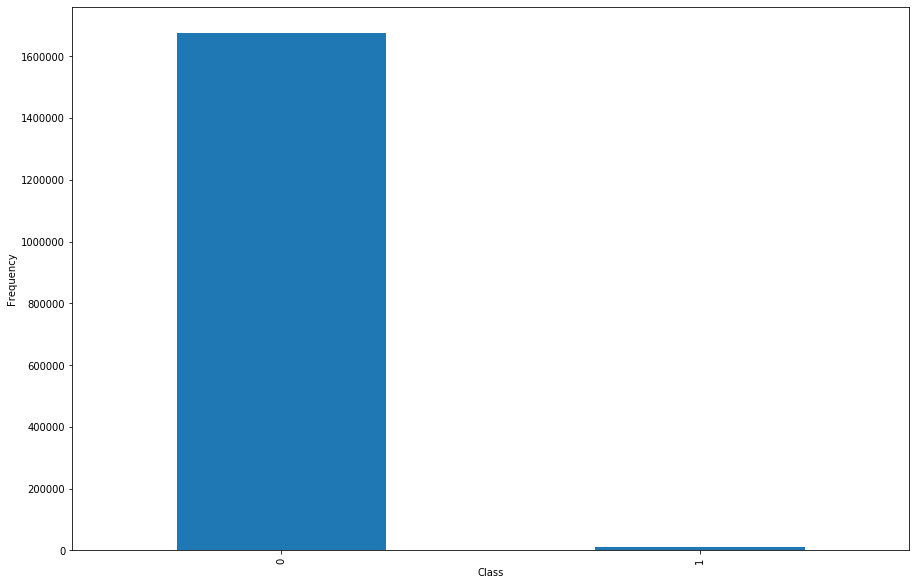

In [8]:
plt.figure(figsize=(15,10))
df['went_on_backorder'].value_counts().plot(kind = "bar")
plt.xlabel("Class")
plt.ylabel("Frequency")

## Scale the data 

In [9]:
from sklearn.preprocessing import MinMaxScaler

### Separate the Data

In [10]:
X = df.drop(["went_on_backorder" , "sku"] ,1 )
y = df["went_on_backorder"]

In [11]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)


In [12]:
X_sc

array([[2.20488187e-03, 1.53846154e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.20504366e-03, 1.73076923e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.20504366e-03, 1.53846154e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.20480097e-03, 1.73076923e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.20989738e-03, 1.73076923e-01, 3.26925592e-05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.20641888e-03, 7.69230769e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [13]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1687855    0
1687856    0
1687857    1
1687858    0
1687859    0
Name: went_on_backorder, Length: 1687860, dtype: int32

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.30, random_state = 62)

I will attempt to perform 3 methods of sampling to resolve this imbalanced dataset issue

##### Undersampling

##### Oversampling

##### SMOTE - Synthetic Minority Oversampling Technique


## 1. Undersampling

#### The process of reducing the class instances of the MAJORITY class is called Undersampling. I will attempt to undersample the data and give a 50/50 ratio to each of the class's instances. Following are the steps for undersampling

    * Find the number of the minority class

    * Find the indices of the majority class

    * Find the indices of the minority class

    * Randomly sample the majority indices with respect to the minority numbers

    * Concat the minority indices with the indices from step 4

    * Get the balanced dataframe - This is the final undersampled data

#### Disadvantage is you will lose critical data as you are reducing the instances of the majority class.



## 1 - Backorder (Minority Class)
## 0 - Not Backorder (Majority Class)

In [15]:
#1. Find the number of the minority class

number_bo = len(df[df['went_on_backorder']==1])

In [16]:
number_not_bo = len(df[df['went_on_backorder']==0])

In [17]:
print(number_bo)
print(number_not_bo)

11293
1676567


In [18]:
#2. Find the indices of the majority class
index_not_bo= df[df['went_on_backorder']==0].index

In [19]:
#.3 Find the indices of the minority class
index_bo = df[df['went_on_backorder']==1].index

In [20]:
#4. Randomly sample the majority indices with respect to the number of minority classes
random_indices = np.random.choice(index_not_bo, number_bo,replace='False')

In [21]:
len(random_indices)

11293

In [22]:
#5. Concat the minority indices with the indices from step 4
under_sample_indices = np.concatenate([index_bo,random_indices])

In [23]:
#Get the balanced dataframe - This is the final undersampled data
under_sample_df = df.iloc[under_sample_indices]

In [24]:
under_sample_df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
143,1111623,0.0,8.0,0.0,2.0,3.0,5.0,0.0,3.0,3.0,3.0,2.0,0,0.0,0.68,0.58,0.0,0,0,1,1,0,1
173,1111652,24.0,8.0,0.0,3456.0,3456.0,3456.0,10.0,39.0,68.0,93.0,7.0,0,0.0,1.00,0.95,1.0,0,0,1,1,0,1
176,1111655,-55.0,8.0,2.0,428.0,526.0,606.0,25.0,100.0,205.0,387.0,52.0,0,0.0,0.85,0.83,56.0,0,0,0,1,0,1
180,1111659,30.0,8.0,14.0,42.0,84.0,126.0,7.0,56.0,107.0,148.0,24.0,0,0.0,0.98,0.92,0.0,0,0,0,1,0,1
191,1111670,-499.0,12.0,350.0,3452.0,5044.0,7188.0,747.0,2550.0,3572.0,4745.0,401.0,0,0.0,0.49,0.72,525.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494203,3086168,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0.0,0.98,0.98,0.0,0,0,0,1,0,0
268138,1616126,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.42,0.36,0.0,0,0,0,1,0,0
393279,1741241,106.0,8.0,0.0,0.0,0.0,0.0,4.0,13.0,19.0,20.0,0.0,0,0.0,0.00,0.00,0.0,0,0,1,1,0,0
1300974,2885120,0.0,4.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.73,0.78,0.0,1,0,1,1,0,0


In [25]:
Counter(under_sample_df["went_on_backorder"])

Counter({1: 11293, 0: 11293})

In [26]:
under_sample_backorder_counts = pd.value_counts(under_sample_df['went_on_backorder'])

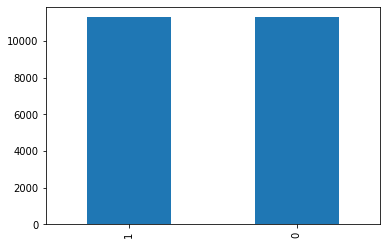

In [27]:
under_sample_backorder_counts.plot(kind = "bar")

In [28]:
## now that our data is equally distributed, we can split the data to X,y, train and test

In [29]:
X_under = under_sample_df.drop(["sku" , "went_on_backorder"] , 1)
y_under = under_sample_df["went_on_backorder"]

In [30]:
x_under_train, x_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.30, random_state=100)

## Random Forest 

In [31]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [32]:
# Let's run the model

rf = RandomForestClassifier()
rf.fit(x_under_train, y_under_train)

RandomForestClassifier()

#### Random Forest Prediction

In [33]:
# Predicted probabilities
y_pred = rf.predict_proba(x_under_test)

In [34]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [35]:
# Converting to column dataframe (keeping the outcome of 1)
y_pred_1 = y_pred_df.iloc[:,[1]]

In [36]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_under_test)

In [37]:
# Putting sku to index
y_test_df['sku'] = y_test_df.index

In [38]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [39]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [40]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'went_backorder_Prob'})

In [41]:
cols = y_pred_final.columns.tolist()
cols

['went_on_backorder', 'sku', 'went_backorder_Prob']

In [42]:
cols.insert(1, cols.pop(cols.index('went_on_backorder')))  ## 0 is the destination index , Mid is ur feature
cols

['sku', 'went_on_backorder', 'went_backorder_Prob']

In [43]:
y_pred_final = y_pred_final.reindex(columns= cols)
y_pred_final.head()
## Column reindex is performed 

,sku,went_on_backorder,went_backorder_Prob
0,862938,1,0.99
1,876434,0,0.00
2,1216385,0,0.19
3,1169516,1,0.97
4,228081,1,0.88


In [44]:
# Creating new column 'predicted' with 1 if went_on_backorder >0.5 else 0
y_pred_final['predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [45]:
y_pred_final

,sku,went_on_backorder,went_backorder_Prob,predicted
0,862938,1,0.990000,1
1,876434,0,0.000000,0
2,1216385,0,0.190000,0
3,1169516,1,0.970000,1
4,228081,1,0.880000,1
...,...,...,...,...
6771,924516,1,0.900000,1
6772,94915,0,0.022857,0
6773,739108,0,0.000000,0
6774,1395287,0,1.000000,1


In [46]:
from sklearn import metrics 

In [47]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final.predicted )
confusion

array([[3000,  370],
       [ 211, 3195]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

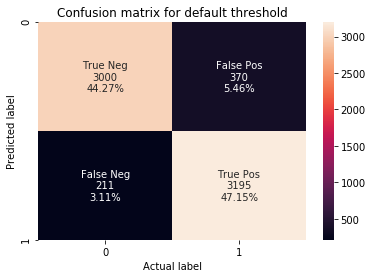

In [48]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [49]:
Accuracy = metrics.accuracy_score(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Accuracy)

0.9142561983471075


In [50]:
Classification = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Classification)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3370
           1       0.90      0.94      0.92      3406

    accuracy                           0.91      6776
   macro avg       0.92      0.91      0.91      6776
weighted avg       0.92      0.91      0.91      6776



### ROC Plot

In [51]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [52]:
def roc_auc(actual , probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    return auc_score

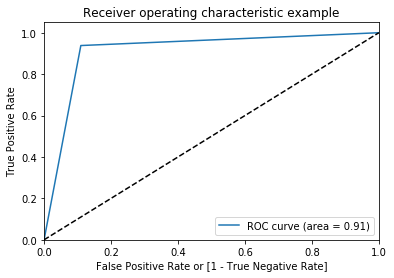

(array([0.        , 0.10979228, 1.        ]),
 array([0.       , 0.9380505, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [53]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.predicted)

In [54]:
from sklearn.metrics import recall_score , precision_score , f1_score

In [55]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 91.41291071263663
The Recall score is :  93.80504991192015
The Precision score is :  89.62131837307152
The f1 score is :  91.66547123798595


In [56]:
print(confusion)

[[3000  370]
 [ 211 3195]]


Text(33.0, 0.5, 'Predicted label')

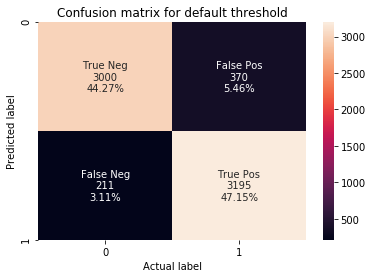

In [57]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

## Comparison

##### ROC_AUC

In [68]:
#Training score
from sklearn.metrics import roc_auc_score
pred_train=rf.predict(x_under_train)

print("The Training roc_auc score for Under Sampling is :", roc_auc_score(y_under_train,pred_train)*100)
print("The Testing roc_auc score for Under Sampling is :", roc_auc_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training roc_auc score for Under Sampling is : 99.66440733021479
The Testing roc_auc score for Under Sampling is : 91.41291071263663


##### PRECISION

In [69]:
print("The Training Precision score for Under Sampling is :", precision_score(y_under_train,pred_train)*100)
print("The Testing Precision score for Under Sampling is :", precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training Precision score for Under Sampling is : 99.82192826252862
The Testing Precision score for Under Sampling is : 89.62131837307152


##### RECALL

In [70]:
print("The Training Recall score for Under Sampling is :", recall_score(y_under_train,pred_train)*100)
print("The Testing Recall score for Under Sampling is :", recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training Recall score for Under Sampling is : 99.505515405097
The Testing Recall score for Under Sampling is : 93.80504991192015


##### F1

In [71]:
print("The Training F1 score for Under Sampling is :", f1_score(y_under_train,pred_train)*100)
print("The Testing F1 score for Under Sampling is :", f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training F1 score for Under Sampling is : 99.66347069655217
The Testing F1 score for Under Sampling is : 91.66547123798595


## Feature Importance

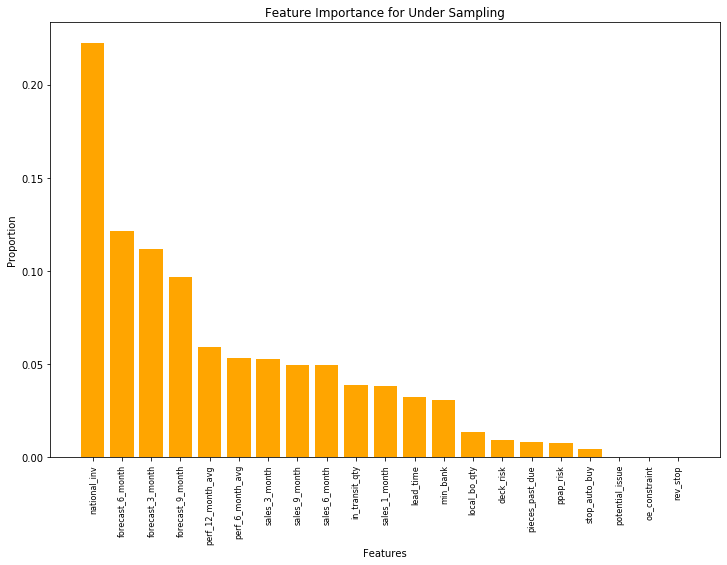

In [63]:
# Calculate feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_under.columns[i] for i in indices]

# Barplot: Add bars
plt.figure(figsize=(12,8))
plt.bar(range(X_under.shape[1]), importances[indices] , color = "orange")
# Add feature names as x-axis labels
plt.xticks(range(X_under.shape[1]), names, rotation=90, fontsize = 8)

# Create plot title
plt.title("Feature Importance for Under Sampling")
# Show plot
plt.xlabel("Features")
plt.ylabel("Proportion")
plt.show()

## Insights 
    

    * Here False negatives are 211, this impacts recall. Making it 93.8 %
    * As per the feature importance plot, Inventory plays a vital role. 
    * More than 20% importance was given to national inventory by the algorithm.
    * This indicates that national inventory has a huge impact on predicting if the prodcut goes to backorder or not.
    * Subsequently, there are other features to which the algorithm has given importance.
    * if we consider the right part of the plot, we have production related features which are not that important as per the        algorithm.
       
    

--------------------------------------------------------------------------------------------------------------------------------

# 2. Over Sampling

The process of increasing the class instances of the MINORITY class is called Oversampling. 

#### Disadvantage
     * It will cause OVERFITTING as we are increasing the samples of the minority class..

### 1 - Backorder (Minority Class)

### 0  - Not Backorder (Majority Class)

In [72]:
BO_sample = df[df['went_on_backorder']==1].sample(number_not_bo, replace=True)

In [73]:
#create a new dataframe containing only non-fraud data
df_not_BO = df[df['went_on_backorder']==0]

In [74]:
over_sample_df = pd.concat([BO_sample,df_not_BO], axis=0)

In [75]:
over_sample_df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
878891,2226873,1.0,8.0,0.0,29.0,29.0,35.0,5.0,6.0,17.0,26.0,0.0,0,0.0,0.99,0.97,0.0,0,0,0,1,0,1
1331878,2917141,0.0,8.0,1.0,9.0,13.0,17.0,0.0,11.0,13.0,13.0,0.0,0,0.0,0.79,0.87,0.0,0,0,0,1,0,1
36938,1148427,0.0,2.0,0.0,56.0,107.0,162.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.00,0.99,0.0,1,0,1,1,0,1
822039,2170000,0.0,14.0,0.0,12.0,12.0,12.0,0.0,0.0,1.0,3.0,0.0,0,0.0,0.46,0.38,0.0,0,0,0,1,0,1
230120,1341680,7.0,2.0,0.0,10.0,20.0,40.0,8.0,15.0,25.0,31.0,0.0,0,0.0,0.98,0.90,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687854,1392420,124.0,8.0,140.0,410.0,780.0,1240.0,128.0,464.0,849.0,1074.0,111.0,0,0.0,0.85,0.90,1.0,0,0,0,1,0,0
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687856,1373987,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0,0.0,0.85,0.83,1.0,0,0,0,1,0,0
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.0,0.86,0.84,6.0,0,0,0,1,0,0


In [76]:
over_sample_wen_on_BO_counts=pd.value_counts(over_sample_df['went_on_backorder'])

In [77]:
Counter(over_sample_df["went_on_backorder"])

Counter({1: 1676567, 0: 1676567})

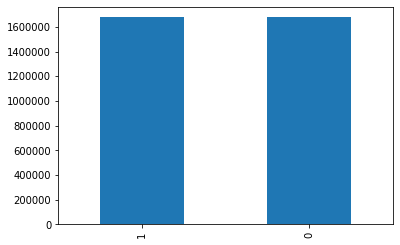

In [78]:
over_sample_wen_on_BO_counts.plot(kind='bar')

##### Now that our data is balanced , we can split the data to X , y, Train and test

In [80]:
X_over = over_sample_df.drop(["sku" , "went_on_backorder"] , 1)
y_over = over_sample_df["went_on_backorder"]

In [81]:
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.30, random_state=100)

### Random Forest 

In [82]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [83]:
# Let's run the model

rf = RandomForestClassifier()
rf.fit(x_over_train, y_over_train)

RandomForestClassifier()

#### Random Forest Prediction

In [84]:
# Predicted probabilities
y_pred = rf.predict_proba(x_over_test)

In [85]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [86]:
# Converting to column dataframe (keeping the outcome of 1)
y_pred_1 = y_pred_df.iloc[:,[1]]

In [87]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_over_test)

In [88]:
# Putting sku to index
y_test_df['sku'] = y_test_df.index

In [89]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [90]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [91]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'went_backorder_Prob'})

In [92]:
cols = y_pred_final.columns.tolist()
cols

['went_on_backorder', 'sku', 'went_backorder_Prob']

In [93]:
cols.insert(1, cols.pop(cols.index('went_on_backorder')))  ## 0 is the destination index , Mid is ur feature
cols

['sku', 'went_on_backorder', 'went_backorder_Prob']

In [94]:
y_pred_final = y_pred_final.reindex(columns= cols)
y_pred_final.head()
## Column reindex is performed 

,sku,went_on_backorder,went_backorder_Prob
0,330027,0,0.00
1,1678400,0,0.01
2,1214430,1,1.00
3,1627106,0,0.00
4,732943,0,0.00


In [95]:
# Creating new column 'predicted' with 1 if went_on_backorder >0.5 else 0
y_pred_final['predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [96]:
y_pred_final

,sku,went_on_backorder,went_backorder_Prob,predicted
0,330027,0,0.00,0
1,1678400,0,0.01,0
2,1214430,1,1.00,1
3,1627106,0,0.00,0
4,732943,0,0.00,0
...,...,...,...,...
1005936,1453917,0,0.00,0
1005937,384689,0,0.00,0
1005938,339839,1,1.00,1
1005939,211619,1,1.00,1


In [97]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final.predicted )
confusion

array([[500512,   2193],
       [  1977, 501259]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

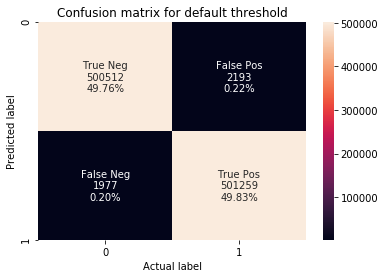

In [98]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [99]:
Classification = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    502705
           1       1.00      1.00      1.00    503236

    accuracy                           1.00   1005941
   macro avg       1.00      1.00      1.00   1005941
weighted avg       1.00      1.00      1.00   1005941



In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic example')
    #plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

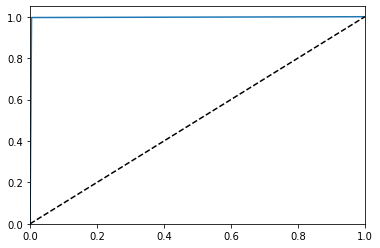

(array([0.       , 0.0043624, 1.       ]),
 array([0.        , 0.99607143, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [101]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.predicted)

In [102]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 99.58545131567578
The Recall score is :  99.60714257326583
The Precision score is :  99.56440733178138
The f1 score is :  99.58577036778028


#### The Oversampling method is highly overfitting

In [103]:
print(confusion)

[[500512   2193]
 [  1977 501259]]


Text(33.0, 0.5, 'Predicted label')

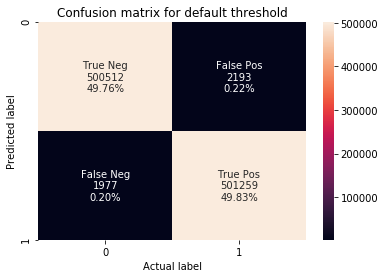

In [104]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

### COMPARISON

#### ROC_AUC

In [105]:
#Training score
from sklearn.metrics import roc_auc_score
pred_train=rf.predict(x_over_train)

print("The Training roc_auc score for Over Sampling is :", roc_auc_score(y_over_train,pred_train)*100)
print("The Testing roc_auc score for Over Sampling is :", roc_auc_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training roc_auc score for Over Sampling is : 99.61366077899893
The Testing roc_auc score for Over Sampling is : 99.58545131567578


#### PRECISION

In [107]:
print("The Training Precision score for Over Sampling is :", precision_score(y_over_train,pred_train)*100)
print("The Testing Precision score for Over Sampling is :", precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training Precision score for Over Sampling is : 99.63726933902697
The Testing Precision score for Over Sampling is : 99.56440733178138


#### RECALL

In [108]:
print("The Training Recall score for Over Sampling is :", recall_score(y_over_train,pred_train)*100)
print("The Testing Recall score for Over Sampling is :", recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training Recall score for Over Sampling is : 99.58971509318343
The Testing Recall score for Over Sampling is : 99.60714257326583


### F1 

In [109]:
print("The Training F1 score for Over Sampling is :", f1_score(y_over_train,pred_train)*100)
print("The Testing F1 score for Over Sampling is :", f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training F1 score for Over Sampling is : 99.61348654065338
The Testing F1 score for Over Sampling is : 99.58577036778028


     ----It is clear that oversampling the data, is indeed making it overfitting . The data is multiplicated----

## Feature Importance

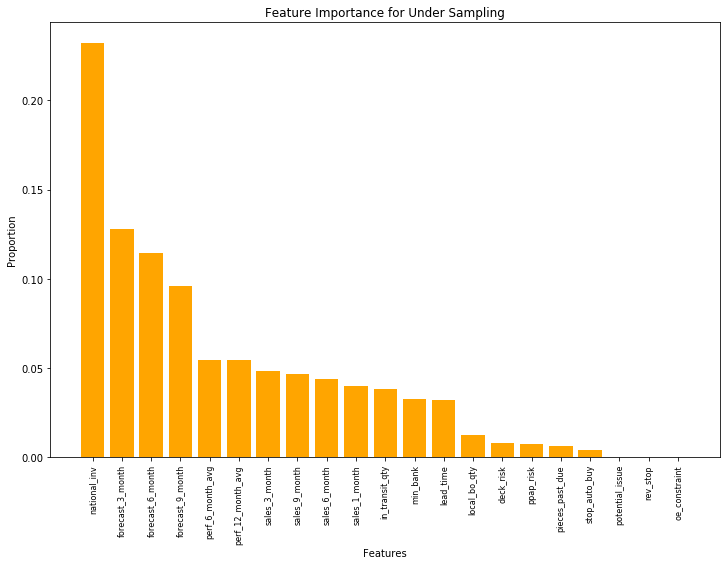

In [111]:
# Calculate feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_over.columns[i] for i in indices]

# Barplot: Add bars
plt.figure(figsize=(12,8))
plt.bar(range(X_over.shape[1]), importances[indices] , color = "orange")
# Add feature names as x-axis labels
plt.xticks(range(X_over.shape[1]), names, rotation=90, fontsize = 8)

# Create plot title
plt.title("Feature Importance for Under Sampling")
# Show plot
plt.xlabel("Features")
plt.ylabel("Proportion")
plt.show()

### Insights:

    * This feature importance plot is similar to the Under Sampling feature importance plot.
    

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

## 3. SMOTE - Synthetic Minority Over Sampling Technique

The right way to work on imbalanced data and SMOTE is to oversample only on the training data, and leave the test data unseen
 
     * Split the training data further into train and validation data
    
              -- original test data = x_test, y_test
    
              -- original train_data = x_train, y_train
    
     * I will further split x_train, y_train to x_val, y_val, x_train_new, y_train_new
    
     * I will build the models on x_val and y_val, and check the model for performance on x_train_new, y_train_new
    
     * Finally I will check the performace of the model on the unseen x_test, y_test

In [15]:
import imblearn
from imblearn.over_sampling import SMOTE

In [16]:
x_val, x_train_new, y_val,y_train_new = train_test_split(x_train, y_train, test_size = 0.30, random_state=12)

In [17]:
sm = SMOTE()

In [18]:
x_train_res, y_train_res = sm.fit_sample(x_val, y_val)

----- Here SMOTE.fit_sample gives me the resampled data i.e the oversampled data -----

In [19]:
#x_train_res, y_train_res = sm.fit_sample(x_val, y_val)
Counter(y_train_res)

Counter({0: 821446, 1: 821446})

### Random Forest 

In [20]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [21]:
# Let's run the model

rf = RandomForestClassifier()
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

#### Random Forest prediction

In [22]:
# Predicted probabilities
y_pred = rf.predict_proba(x_test)

In [23]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [24]:
# Converting to column dataframe (keeping the outcome of 1)
y_pred_1 = y_pred_df.iloc[:,[1]]

In [25]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [26]:
# Putting sku to index
y_test_df['sku'] = y_test_df.index

In [27]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [28]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [29]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'went_backorder_Prob'})

In [30]:
cols = y_pred_final.columns.tolist()
cols

['went_on_backorder', 'sku', 'went_backorder_Prob']

In [31]:
cols.insert(1, cols.pop(cols.index('went_on_backorder')))  ## 0 is the destination index , Mid is ur feature
cols

['sku', 'went_on_backorder', 'went_backorder_Prob']

In [32]:
y_pred_final = y_pred_final.reindex(columns= cols)
y_pred_final.head()
## Column reindex is performed 

,sku,went_on_backorder,went_backorder_Prob
0,696721,0,0.003582
1,1580507,0,0.113058
2,733985,0,0.243519
3,1029932,0,0.019209
4,1685688,0,0.100000


In [33]:
# Creating new column 'predicted' with 1 if went_on_backorder >0.5 else 0
y_pred_final['predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [34]:
y_pred_final.head()

,sku,went_on_backorder,went_backorder_Prob,predicted
0,696721,0,0.003582,0
1,1580507,0,0.113058,0
2,733985,0,0.243519,0
3,1029932,0,0.019209,0
4,1685688,0,0.100000,0


### Random Forest Metrics 

In [35]:
from sklearn import metrics 

In [36]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final.predicted )
confusion

array([[490180,  12813],
       [  1550,   1815]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

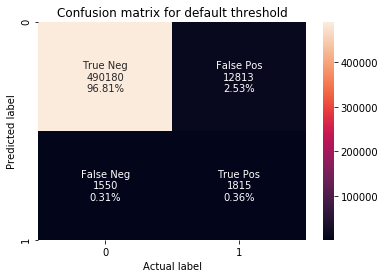

In [37]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')



In [38]:
Classification = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Classification)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    502993
           1       0.12      0.54      0.20      3365

    accuracy                           0.97    506358
   macro avg       0.56      0.76      0.59    506358
weighted avg       0.99      0.97      0.98    506358



### ROC plot

In [39]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    #plt.xlabel('FPR')
    #plt.ylabel('TPR')
    #plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [40]:
def roc_auc(actual , probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    return auc_score

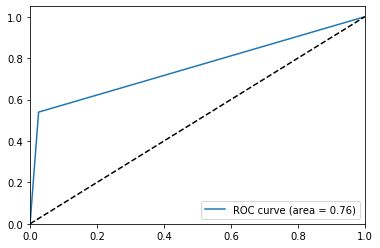

(array([0.        , 0.02547352, 1.        ]),
 array([0.        , 0.53937593, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [41]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.predicted)

In [42]:
roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted)

0.7569512065707807

In [43]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 75.69512065707808
The Recall score is :  53.937592867756315
The Precision score is :  12.407711238720262
The f1 score is :  20.174512310342905


### Comparison

#### ROC_AUC

In [44]:
#Training score
from sklearn.metrics import roc_auc_score
pred_train=rf.predict(x_train)
print("The training roc_auc score SMOTING is :", roc_auc_score(y_train,pred_train)*100)
print("The testing roc_auc score for SMOTING is : ", roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training roc_auc score SMOTING is : 92.0693811809485
The testing roc_auc score for SMOTING is :  75.69512065707808


#### PRECISION

In [46]:
print("The training Precision score SMOTING is :", metrics.precision_score(y_train,pred_train)*100)
print("The testing Precision score for SMOTING is : ", metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training Precision score SMOTING is : 20.76673440296018
The testing Precision score for SMOTING is :  12.407711238720262


#### RECALL

In [47]:
print("The training Recall score SMOTING is :", metrics.recall_score(y_train,pred_train)*100)
print("The testing Recall score for SMOTING is : ", metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training Recall score SMOTING is : 86.36478304742684
The testing Recall score for SMOTING is :  53.937592867756315


#### F1

In [48]:
print("The training F1 score SMOTING is :", metrics.f1_score(y_train,pred_train)*100)
print("The testing F1 score for SMOTING is : ", metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training F1 score SMOTING is : 33.48248123426
The testing F1 score for SMOTING is :  20.174512310342905


## Feature Importance

In [156]:
x_train = pd.DataFrame(x_train)

In [165]:
x_train = x_train.rename(columns={0:"national_inv",1:"lead_time",2:"in_transit_qty",3:"forecast_3_month",4:"forecast_6_month",
                                  5:"forecast_9_month",6:"sales_1_month",7:"sales_3_month",8:"sales_6_month",9:"sales_9_month",
                                 10:"min_bank",11:"potential_issue",12:"pieces_past_due",13:"perf_6_month_avg",14:"perf_12_month_avg",
                                 15:"local_bo_qty",16:"deck_risk",17:"oe_constraint",18:"ppap_risk",19:"stop_auto_buy",20:"rev_stop"})

In [166]:
x_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,0.002205,0.153846,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.658476e-07,6.239915e-07,0.000003,0.0,0.0,0.98,0.95,0.0,0.0,0.0,0.0,1.0,0.0
1,0.002216,0.153846,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000004,7.236689e-06,1.071449e-05,9.671868e-06,0.000006,0.0,0.0,0.85,0.83,0.0,1.0,0.0,0.0,1.0,0.0
2,0.002205,0.153846,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,9.045861e-07,4.658476e-07,3.119957e-07,0.000003,0.0,0.0,0.98,0.94,0.0,0.0,0.0,0.0,1.0,0.0
3,0.002206,0.230769,0.000027,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000003,0.0,0.0,0.58,0.58,0.0,1.0,0.0,0.0,1.0,0.0
4,0.002209,0.153846,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000006,0.0,0.0,0.35,0.54,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181497,0.002205,0.076923,0.000000,0.000000,4.062795e-07,5.294782e-07,0.000000,1.809172e-06,9.316951e-07,6.239915e-07,0.000000,0.0,0.0,0.73,0.78,0.0,0.0,0.0,0.0,1.0,0.0
1181498,0.002220,1.000000,0.000008,0.000084,4.875353e-05,3.176869e-05,0.000018,2.442382e-05,2.049729e-05,1.996773e-05,0.000051,0.0,0.0,0.97,0.93,0.0,1.0,0.0,1.0,0.0,0.0
1181499,0.002206,0.153846,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.82,0.81,0.0,0.0,0.0,0.0,1.0,0.0
1181500,0.002205,0.173077,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.658476e-07,3.119957e-07,0.000000,0.0,0.0,0.93,0.78,0.0,0.0,0.0,0.0,1.0,0.0


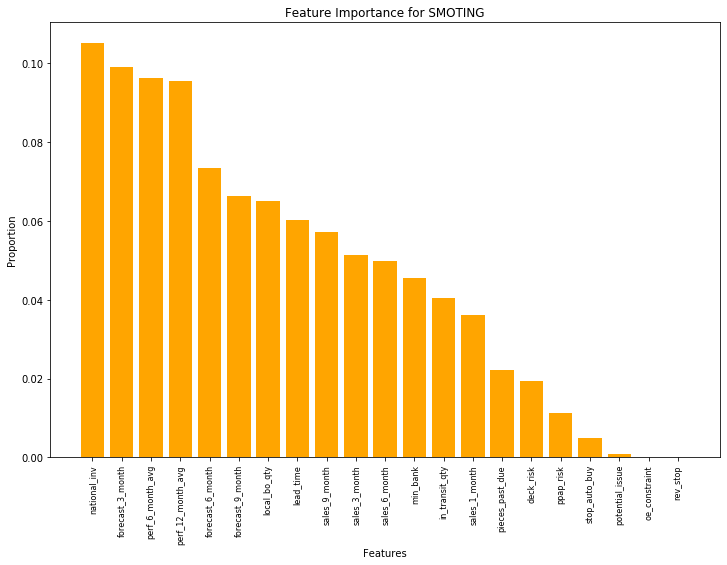

In [168]:
# Calculate feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_train.columns[i] for i in indices]

# Barplot: Add bars
plt.figure(figsize=(12,8))
plt.bar(range(x_train.shape[1]), importances[indices] , color = "orange")
# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=90, fontsize = 8)

# Create plot title
plt.title("Feature Importance for SMOTING")
# Show plot
plt.xlabel("Features")
plt.ylabel("Proportion")
plt.show()

### Insights: 

    * Unlike, Under sampling or Over Sampling, here forecast_3months,perf_6months and perf_12months are close to                    national_inventory.
    * Thus Smoting technique, gave importance to top 4 features.
    

### Lets see if we can optimise the threshold 

#### Youdens-cuttoff

In [49]:
#Threshold Moving
#func for best threshold
def best_threshold(tpr,fpr):
    J = tpr - fpr
    ix = np.argmax(J) 
    best_thresh = thresholds[ix]
    return(f'Best Threshold',np.round(best_thresh,6))

In [50]:
# calculate roc curves with probability
fpr, tpr, thresholds = roc_curve(y_pred_final.went_on_backorder, y_pred_final.went_backorder_Prob)

In [51]:
best_threshold(tpr,fpr)

('Best Threshold', 0.177324)

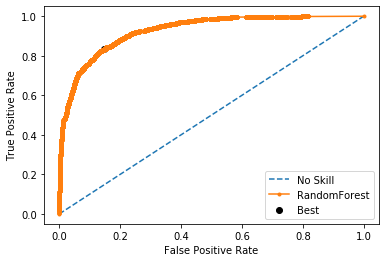

In [52]:
# plot the roc curve for the model
ix = np.argmax(tpr-fpr)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

### Youdens Cutoff - 0.177

In [53]:
y_pred_final['final_predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x >= best_threshold(tpr,fpr)[1] else 0)

In [54]:
y_pred_final.head()

,sku,went_on_backorder,went_backorder_Prob,predicted,final_predicted
0,696721,0,0.003582,0,0
1,1580507,0,0.113058,0,0
2,733985,0,0.243519,0,1
3,1029932,0,0.019209,0,0
4,1685688,0,0.100000,0,0


In [55]:
Confusion_after_opt_thres = metrics.confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
print(Confusion_after_opt_thres)
## the FP has increased tremendously, but the FN have decreases subsequently.

[[429447  73546]
 [   560   2805]]


Text(33.0, 0.5, 'Predicted label')

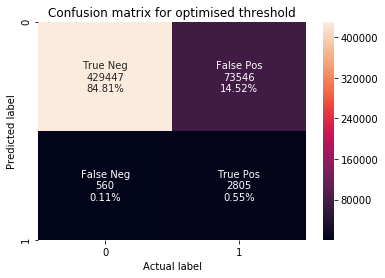

In [56]:
#confusion matrix for optimised threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for optimised threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


In [57]:
Classification_after_opt_thres = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
print(Classification_after_opt_thres)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    502993
           1       0.04      0.83      0.07      3365

    accuracy                           0.85    506358
   macro avg       0.52      0.84      0.50    506358
weighted avg       0.99      0.85      0.91    506358



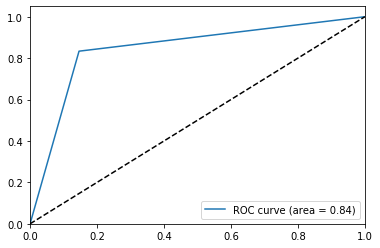

(array([0.        , 0.14621675, 1.        ]),
 array([0.        , 0.83358098, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [58]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.final_predicted)

In [59]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The AUC score is : 84.36821170641929
The Recall score is :  83.35809806835067
The Precision score is :  3.673822215819046
The f1 score is :  7.037483064880325


In [60]:
print(Confusion_after_opt_thres)

[[429447  73546]
 [   560   2805]]


Text(33.0, 0.5, 'Predicted label')

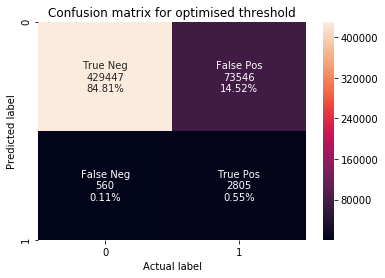

In [61]:
#confusion matrix for optimised threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for optimised threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


### Comparison for SMOTING

### BEFORE OPTIMISING THRESHOLD

#### ROC_AUC

In [62]:
print("The training roc_auc score SMOTING is :", roc_auc_score(y_train,pred_train)*100)
print("The testing roc_auc score for SMOTING is : ", roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training roc_auc score SMOTING is : 92.0693811809485
The testing roc_auc score for SMOTING is :  75.69512065707808


#### PRECISION

In [70]:
print("The training Precision score SMOTING is :", metrics.precision_score(y_train,pred_train)*100)
print("The testing Precision score for SMOTING is : ", metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training Precision score SMOTING is : 20.76673440296018
The testing Precision score for SMOTING is :  12.407711238720262


#### RECALL

In [63]:
print("The training Recall score SMOTING is :", metrics.recall_score(y_train,pred_train)*100)
print("The testing Recall score for SMOTING is : ", metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training Recall score SMOTING is : 86.36478304742684
The testing Recall score for SMOTING is :  53.937592867756315


#### F1 

In [64]:
print("The training F1 score SMOTING is :", metrics.f1_score(y_train,pred_train)*100)
print("The testing F1 score for SMOTING is : ", metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training F1 score SMOTING is : 33.48248123426
The testing F1 score for SMOTING is :  20.174512310342905


#### OVERALL

In [65]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 75.69512065707808
The Recall score is :  53.937592867756315
The Precision score is :  12.407711238720262
The f1 score is :  20.174512310342905


In [66]:
print(confusion)

[[490180  12813]
 [  1550   1815]]


Text(33.0, 0.5, 'Predicted label')

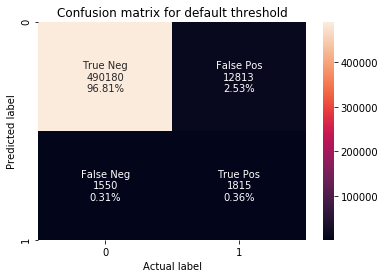

In [67]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


### AFTER OPTIMISING THRESHOLD

#### ROC_AUC

In [68]:
print("The training roc_auc score SMOTING is :", roc_auc_score(y_train,pred_train)*100)
print("The testing roc_auc score for SMOTING is : ", roc_auc(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The training roc_auc score SMOTING is : 92.0693811809485
The testing roc_auc score for SMOTING is :  84.36821170641929


#### PRECISION

In [69]:
print("The training Precision score SMOTING is :", metrics.precision_score(y_train,pred_train)*100)
print("The testing Precision score for SMOTING is : ", metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The training Precision score SMOTING is : 20.76673440296018
The testing Precision score for SMOTING is :  3.673822215819046


#### RECALL

In [72]:
print("The training Recall score SMOTING is :", metrics.recall_score(y_train,pred_train)*100)
print("The testing Recall score for SMOTING is : ", metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The training Recall score SMOTING is : 86.36478304742684
The testing Recall score for SMOTING is :  83.35809806835067


#### F1

In [73]:
print("The training F1 score SMOTING is :", metrics.f1_score(y_train,pred_train)*100)
print("The testing F1 score for SMOTING is : ", metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The training F1 score SMOTING is : 33.48248123426
The testing F1 score for SMOTING is :  7.037483064880325


#### OVERALL

In [74]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The AUC score is : 84.36821170641929
The Recall score is :  83.35809806835067
The Precision score is :  3.673822215819046
The f1 score is :  7.037483064880325


In [75]:
print(Confusion_after_opt_thres)

[[429447  73546]
 [   560   2805]]


Text(33.0, 0.5, 'Predicted label')

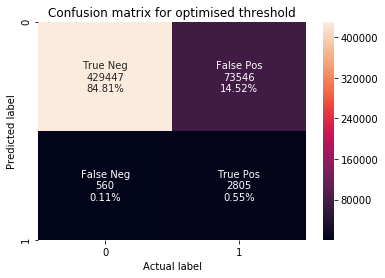

In [76]:
#confusion matrix for optimised threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for optimised threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


## Insights 

    * We have to check the recall performance metric, as it could reduce our False Negative(Type II error) 
    * Since we are getting 83% of recall, It is a good model as we select less False Negative with high cost 

### Let's create a Data Frame 

In [77]:
# initialize the data

data = {"Under Sampling" : [99.66,91.41,99.82,89.62,99.50,93.80,99.66,91.66] ,
        "Over Sampling" : [99.61,99.58,99.63,99.56,99.58,99.60,99.61,99.58],
       "Smoting Before Threshold":[92.06,75.69,20.76,12.40,86.36,53.93,33.48,20.17],
       "Smoting After Threshold":[92.06,84.36,20.76,3.67,86.36,83.35,33.48,7.07]}

In [81]:
index = ["Training ROC_AUC","Testing ROC_AUC","Training PRECISION","Testing PRECISION","Training RECALL","Testing RECALL","Training F1","Testing F1"]

In [82]:
final_df = pd.DataFrame(data,index=index)

In [83]:
final_df

,Under Sampling,Over Sampling,Smoting Before Threshold,Smoting After Threshold
Training ROC_AUC,99.66,99.61,92.06,92.06
Testing ROC_AUC,91.41,99.58,75.69,84.36
Training PRECISION,99.82,99.63,20.76,20.76
Testing PRECISION,89.62,99.56,12.40,3.67
Training RECALL,99.50,99.58,86.36,86.36
Testing RECALL,93.80,99.60,53.93,83.35
Training F1,99.66,99.61,33.48,33.48
Testing F1,91.66,99.58,20.17,7.07


## Overall Insights of Re-sampling Techniques 

    * The problem statement is to predict if the product has gone to backorder or not.
    
    * While considering this objective, there are various performance metrics which can be pritoritized. 
    
    * Hence, we will be focussing on the Recall metrics for this dataset. 
    
    * Recall concentrates more on the False Negatives.
    
    * Here, False Negatives are "Incorrectly Classified Non Back Order"
    
    * Lower the FN, Better the model predictions.
    
    * Undersampling (FN = 211) , Oversampling (FN = 1977) , SMOTE (FN = 560)[After Threshold optimisation]
    
    * It is clearly understood that, if we undersample the data, we will be obtaining the least FN.
    
    * However, Undersampling leads to huge loss of data. 
    
    * The observations in this data is highly critical, we should not tolerate loss of data. 
    
    * In-order to recover from this, we can optimise the threshold in our Machine Learning Algorithm. 
    